# Example Notebook

## Introduction

This notebook is intended as an example piece of coursework.

Students will fill in the code sections.

### Installation/Requirements

This example is written using Python 3.9 with requirements listed in the requirements.txt file. Requirements can be installed using

```pip install -r requirements.txt```

Or can be installed manually.

### Marking

Work will be marked as a holistic whole and students may be asked to explain parts of their code,
but it should be possible to understand the code by reading it alone e.g. by including comments where relevant.

Understanding can be demonstrated by producing relevant figures/metrics or by writing comments in code or markdown cells.

### Hints

 - Use of the scikit-learn package is encouraged but not required. Their documentation is extremely clear.

 - external packages will make the implementation of algorithms in code 'simple' but you should still demonstrate that the model outputs
make sense in the context of the course content e.g. by ensuring that parameters are defined.

 - Often later questions will build on earlier parts. It may be helpful to write the supporting code in functions and/or classes so that they can be reused.

 - The notebook is expected to produce its outputs by 'run all cells'




## Expressivity vs generalisation

This coursework is designed to practically explore the content given in the lectures in week 2.

### Data

In [135]:
import math

#DO NOT CHANGE THIS CODE
import numpy as np
import matplotlib.pyplot as plt
X_train=np.loadtxt('./data/X_train_linear.txt')
X_test=np.loadtxt('./data/X_test_linear.txt')
y_train=np.loadtxt('./data/y_train_linear.txt')
y_test=np.loadtxt('./data/y_test_linear.txt')

### 1) Linear Regression
#### a) estimate w and b using linear regression based on the training data (X_train, y_train)

In [136]:
from AI_library.LinearRegression import LinearRegressionModel

linear_regression = LinearRegressionModel(X_train, y_train)
linear_line_fit = linear_regression.get_line_fit()
print("The weights are: %s" % linear_line_fit.get("weights"))
print("The bias is: %s" % linear_line_fit.get("bias"))

The weights are: [ 0.02637126  0.00659893  0.01496616  0.03206683  0.0268713  -0.01315983
  0.01519122 -0.00027176 -0.00064972  0.00393864  0.00350256  0.02429592
  0.01353974  0.00389143  0.0060995   0.00529986  0.02363134 -0.00320678
  0.00560827 -0.01287703]
The bias is: -0.0009936338899170349


#### b) calculate the mean squared error for the training data and test data

In [137]:
y_predicted_test, MSE = linear_regression.predict(X_test, y_test)
print("Mean squared error is %.10f" % MSE)

Mean squared error is 0.0002756601


### 2) Exploring the effects of dimensionality
#### a) Using different sized subsets of the training data, repeat (1) and illustrate the trends of training error and test error as the sample size is increased


(10.0, 100.0)

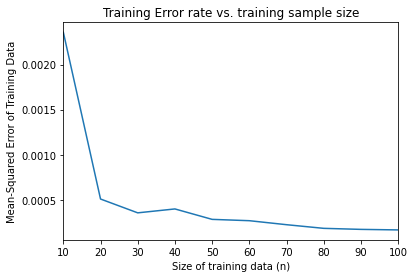

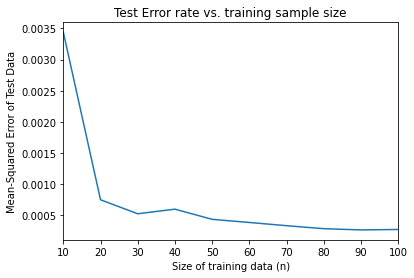

In [138]:
mse_test_results = []
mse_train_results = []

size_of_training_subset = range(10, len(X_train) + 1, math.floor(len(X_train)/10))

for i in size_of_training_subset:
    training_X = X_train[0:i,:]
    training_y = y_train[0:i]
    model = LinearRegressionModel(training_X, training_y)
    y_predicted_test, mse_test = model.predict(X_test, y_test)
    y_predicted_train, mse_train = model.predict(X_train, y_train)
    mse_test_results.append(mse_test)
    mse_train_results.append(mse_train)

plt.figure()
plt.plot(size_of_training_subset, mse_train_results)
plt.xlabel("Size of training data (n)")
plt.ylabel("Mean-Squared Error of Training Data")
plt.title("Training Error rate vs. training sample size")
plt.xlim(10, 100)

plt.figure()
plt.plot(size_of_training_subset, mse_test_results)
plt.xlabel("Size of training data (n)")
plt.ylabel("Mean-Squared Error of Test Data")
plt.title("Test Error rate vs. training sample size")
plt.xlim(10, 100)

### 3) Regularisation

#### a) Using a suitable plot, demonstrate the effect of ridge regeularisation on the train and test error

(-3.0, 6.0)

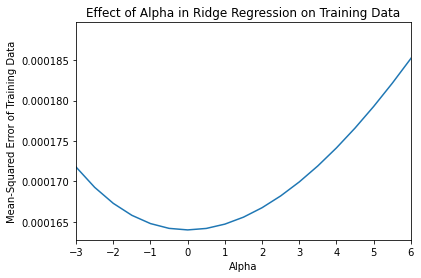

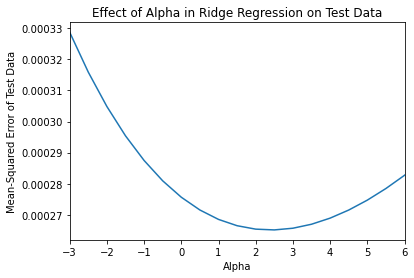

In [139]:
from AI_library.RidgeRegression import RidgeRegressionModel

mse_test_results = []
mse_train_results = []
weights = []

min_alpha = -3
max_alpha = 6
step_size = 0.5
alpha_values = np.arange(min_alpha, max_alpha + 1, step_size)

for alpha in alpha_values:
    model = RidgeRegressionModel(alpha,X_train, y_train)
    y_predicted_test, mse_test = model.predict(X_test, y_test)
    y_predicted_train, mse_train = model.predict(X_train, y_train)
    mse_test_results.append(mse_test)
    mse_train_results.append(mse_train)
    weights.append(model.get_line_fit().get("weights"))

plt.figure()
plt.plot(alpha_values, mse_train_results)
plt.xlabel("Alpha")
plt.ylabel("Mean-Squared Error of Training Data")
plt.title("Effect of Alpha in Ridge Regression on Training Data")
plt.xlim(min_alpha, max_alpha)

plt.figure()
plt.plot(alpha_values, mse_test_results)
plt.xlabel("Alpha")
plt.ylabel("Mean-Squared Error of Test Data")
plt.title("Effect of Alpha in Ridge Regression on Test Data")
plt.xlim(min_alpha, max_alpha)

#### b) Using a suitable metric or plot, demonstrate the effect of ridge regularisation on the estimated weights

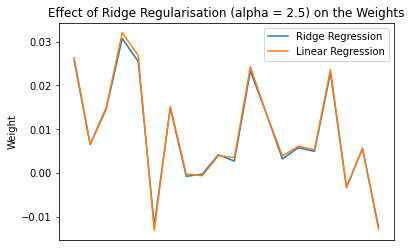

In [140]:
index_of_min_mse = np.argmin(mse_test_results)
alpha_of_minimised_error = alpha_values[index_of_min_mse]

weights = np.array(weights)

plt.figure()
plt.plot(weights[index_of_min_mse,:], label="Ridge Regression")
plt.plot(linear_line_fit.get("weights"), label="Linear Regression")
plt.ylabel("Weight")
plt.xticks(ticks=[])
plt.title("Effect of Ridge Regularisation (alpha = %s) on the Weights" %alpha_of_minimised_error)
plt.legend()

## 4) Kernel Regression

### a) Demonstrate the equivalence of Ridge and Kernel Ridge Regression when using a linear kernel

In [141]:
from AI_library.KernelRidgeRegressionModel import KernelRidgeRegressionModel

ridge_model = RidgeRegressionModel(alpha_of_minimised_error, X_train, y_train)
kernel_ridge_model = KernelRidgeRegressionModel(alpha_of_minimised_error, X_train, y_train)

ridge_predicted, ridge_mse = ridge_model.predict(X_test, y_test)
ridge_line_fit = ridge_model.get_line_fit()
kernel_predicted, kernel_mse = kernel_ridge_model.predict(X_test, y_test)
kernel_line_fit = ridge_model.get_line_fit()

print("The biases for the ridge regression model and Linear-Kernelised ridge regression method are equal: %s" % (ridge_line_fit.get("bias") == kernel_line_fit.get("bias")))
print("The weights for the ridge regression model and Linear-Kernelised ridge regression method are equal: %s" % np.array_equal(np.array(kernel_line_fit.get("weights")), np.array(ridge_line_fit.get("weights"))))


The biases for the ridge regression model and Linear-Kernelised ridge regression method are equal: True
The weights for the ridge regression model and Linear-Kernelised ridge regression method are equal: True


### b) Construct the feature space represented by a polynomial kernel with degree 2 and demonstrate that for small values of ridge regularisation, the predictions of ridge regression with the explicit feature space and kernel ridge regression with the kernel representation are the same (or similar)

In [142]:
#YOUR CODE HERE

### c) Using the following data plot the train and test error for kernel ridge regression with polynomial kernel of different degrees

In [143]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_poly.txt')
X_test=np.loadtxt('./data/X_test_poly.txt')
y_train=np.loadtxt('./data/y_train_poly.txt')
y_test=np.loadtxt('./data/y_test_poly.txt')

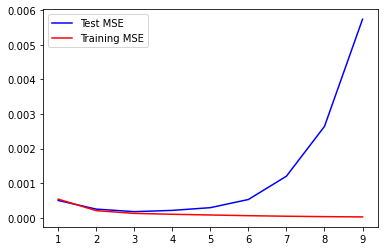

In [144]:
degrees = range(1,10)
mse_train_results = []
mse_test_results = []

for degree in degrees:
    polynomial_model = KernelRidgeRegressionModel(alpha_of_minimised_error, X_train, y_train, kernel="polynomial", degree=degree)
    predicted, mse_test = polynomial_model.predict(X_test, y_test)
    mse_test_results.append(mse_test)
    predicted, mse_train = polynomial_model.predict(X_train, y_train)
    mse_train_results.append(mse_train)

plt.figure()
plt.plot(degrees, mse_test_results, c="b", label="Test MSE")
plt.plot(degrees, mse_train_results, c="r", label="Training MSE")
plt.legend()

### d) Repeat 3a) for a polynomial kernel with degree of your choice

In [145]:
ridge_model = RidgeRegressionModel(alpha_of_minimised_error, X_train, y_train)
polynomial_model = KernelRidgeRegressionModel(alpha_of_minimised_error, X_train, y_train, kernel="polynomial", degree=3)

ridge_predicted, ridge_mse = ridge_model.predict(X_test, y_test)
ridge_line_fit = ridge_model.get_line_fit()
poly_predicted, poly_mse = polynomial_model.predict(X_test, y_test)
poly_line_fit = ridge_model.get_line_fit()

print("The biases for the ridge regression model and Poly-Kernelised ridge regression method are equal: %s" % np.array_equal(np.array(poly_line_fit.get("bias")), np.array(ridge_line_fit.get("bias"))))
print("The weights for the ridge regression model and Poly-Kernelised ridge regression method are equal: %s" % np.array_equal(np.array(poly_line_fit.get("weights")), np.array(ridge_line_fit.get("weights"))))

The biases for the ridge regression model and Poly-Kernelised ridge regression method are equal: True
The weights for the ridge regression model and Poly-Kernelised ridge regression method are equal: True


### e) Using the following data compare the performance of kernel ridge regression with rbf kernel and polynomial kernel

In [146]:
#DO NOT CHANGE THIS CODE
X_train=np.loadtxt('./data/X_train_nonlinear.txt')
X_test=np.loadtxt('./data/X_test_nonlinear.txt')
y_train=np.loadtxt('./data/y_train_nonlinear.txt')
y_test=np.loadtxt('./data/y_test_nonlinear.txt')

In [147]:
rbf_model = KernelRidgeRegressionModel(alpha_of_minimised_error, X_train, y_train, kernel="rbf")
polynomial_model = KernelRidgeRegressionModel(alpha_of_minimised_error, X_train, y_train, kernel="polynomial", degree=3)

predicted, rbf_mse = rbf_model.predict(X_test, y_test)
predicted, poly_mse = polynomial_model.predict(X_test, y_test)

if rbf_mse < poly_mse:
    symbol = ">"
elif rbf_mse > poly_mse:
    symbol = "<"
else:
    symbol = "="
print("RBF Kernel MSE is %s" % rbf_mse)
print("Polynomial Kernel MSE is %s" % poly_mse)
print("Poly MSE %s RBF MSE" % symbol)

RBF Kernel MSE is 0.0017426196715877665
Polynomial Kernel MSE is 0.001689730515224144
Poly MSE < RBF MSE
